In [8]:
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



In [4]:
def load_coffee_data():
    """ Creates a coffee roasting data set.
        roasting duration: 12-15 minutes is best
        temperature range: 175-260C is best
    """
    rng = np.random.default_rng(2)
    X = rng.random(400).reshape(-1,2)
    X[:,1] = X[:,1] * 4 + 11.5          # 12-15 min is best
    X[:,0] = X[:,0] * (285-150) + 150  # 350-500 F (175-260 C) is best
    Y = np.zeros(len(X))
    
    i=0
    for t,d in X:
        y = -3/(260-175)*t + 21
        if (t > 175 and t < 260 and d > 12 and d < 15 and d<=y ):
            Y[i] = 1
        else:
            Y[i] = 0
        i += 1

    return (X, Y.reshape(-1,1))

In [5]:
X,Y = load_coffee_data();
print(X.shape, Y.shape)

(200, 2) (200, 1)


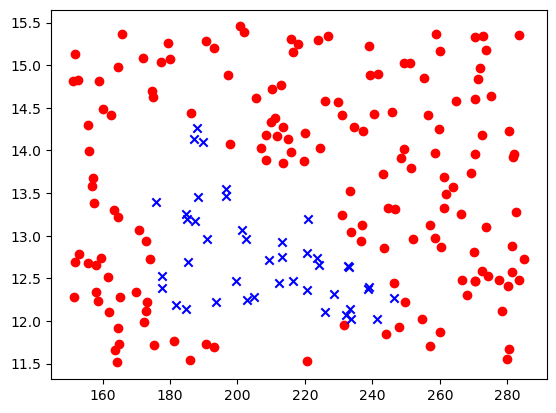

In [10]:
plt.scatter(X[Y[:,0]==0,0],X[Y[:,0]==0,1],marker='o',c='r')
plt.scatter(X[Y[:,0]==1,0],X[Y[:,0]==1,1],marker='x',c='b')


In [11]:
print(X[:,0].min(), X[:,0].max())
print(X[:,1].min(), X[:,1].max())

151.32372212128612 284.99434167453603
11.512747082472469 15.454206928801511


In [ ]:
#Normalising

norm_layer = tf.keras.layers.Normalization(axis=-1)
norm_layer.adapt(X)
Xn = norm_layer(X)

In [21]:
print(tf.reduce_min(Xn[:,0]).numpy(), tf.reduce_max(Xn[:,0]).numpy())
print(tf.reduce_min(Xn[:,1]).numpy(), tf.reduce_max(Xn[:,1]).numpy())

-1.6852185 1.6597542
-1.6996713 1.7932389


In [22]:
#Tile/copy our data to increase the training set size and reduce the number of training epochs.
Xt = np.tile(Xn,(1000,1))
Yt= np.tile(Y,(1000,1))   
print(Xt.shape, Yt.shape) 

(200000, 2) (200000, 1)


In [23]:
tf.random.set_seed(1234)  #to achieve reproducible results

model = Sequential(
    [
        tf.keras.Input(shape=(2,)),
        Dense(3,activation='sigmoid',name='L1'),
        Dense(1,activation='sigmoid',name='L2')
    ],
)

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L2 (Dense)                      │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

In [27]:
w1,b1 = model.get_layer('L1').get_weights()
w2,b2 = model.get_layer('L2').get_weights()

In [31]:
print(w1.shape,w1,b1.shape,b1)
print(w2.shape,w2,b2.shape,b2)


(2, 3) [[-0.9208043  -0.4342407  -0.38091332]
 [ 0.18955183 -0.9490085   0.04026949]] (3,) [0. 0. 0.]
(3, 1) [[-0.6839792 ]
 [-0.4255572 ]
 [-0.09040844]] (1,) [0.]


In [32]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
)

model.fit(Xt,Yt,epochs=10)

Epoch 1/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.1985
Epoch 2/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1344
Epoch 3/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1237
Epoch 4/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1114
Epoch 5/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.0283
Epoch 6/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.0148
Epoch 7/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.0102
Epoch 8/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.0073
Epoch 9/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.0053
Epoch 10/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.0039


In [35]:
w1,b1 = model.get_layer('L1').get_weights()
w2,b2 = model.get_layer('L2').get_weights()
print(w1.shape,w1,b1.shape,b1)
print(w2.shape,w2,b2.shape,b2)

(2, 3) [[13.794671   12.362359    0.03112588]
 [11.559732    0.22628485 -8.545936  ]] (3,) [  1.5219672  12.975748  -10.728385 ]
(3, 1) [[-40.772858]
 [ 33.721207]
 [-39.677982]] (1,) [-11.15826]


In [37]:
X_test = np.array([
    [200,13.9],  # positive example
    [200,17]])  # negative example

X_testn = norm_layer(X_test)
predictions = model.predict(X_testn)
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[[9.6504670e-01]
 [1.2195457e-08]]


In [39]:
yhat = np.zeros_like(predictions)

for i in range(len(predictions)):
    if predictions[i]>=0.5:
        yhat[i]=1
    else:
        yhat[i]=0


In [40]:
print(yhat)

[[1.]
 [0.]]
